# Homework 2 

- In this homework, since my school id's last digit is 8, I dealed with the data " Newly Established Total Firms" provided by https://evds2.tcmb.gov.tr/
- My aim was to predict the values in month 2021-04 but I could not decide which predictor to use so at first I did some manipulations and  visualizations to understand the data.


In [265]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [266]:
df = pd.read_excel("firms_total.xlsx")
firms = df.copy()
firms.drop("Unnamed: 2" , axis = 'columns' , inplace = True)
firms.set_index("Date", inplace = True)
firms.columns = ['Total']
firms.drop(firms.tail(8).index,
        inplace = True)
firms

,Total
Date,
2010-01,5000
2010-02,4230
2010-03,5055
2010-04,4466
2010-05,4072
...,...
2020-11,8782
2020-12,8560
2021-01,11428


In [267]:
firms.describe().T # overall statistics 

,count,unique,top,freq
Total,135,134,5000,2


In [268]:
firms.isnull().values.any() # checked whether there is null values or not  

False

<AxesSubplot:xlabel='Date'>

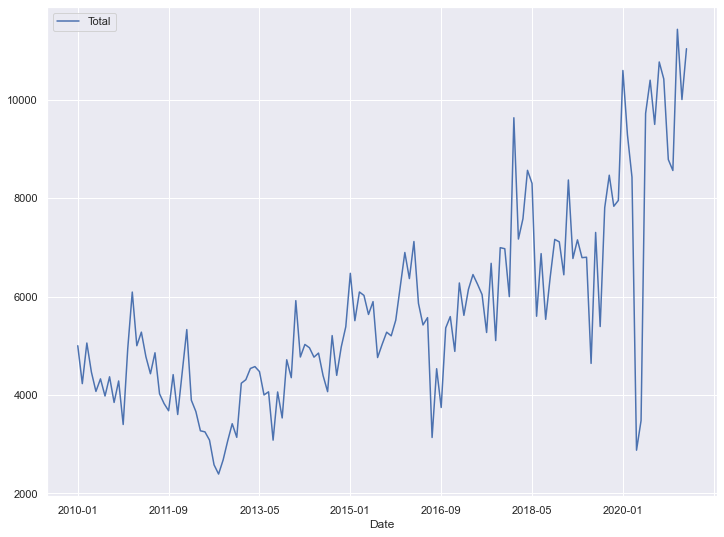

In [269]:
sns.set(rc={'figure.figsize':(12,9)})
firms.plot()

- From the visualization, it is clear that there is an upward trend over the years so I am going to add a trend variable to my data set and model it. Then, I'm going to check residuals for normality assumptions and whether I can add more variable like seasonality or lags. 

In [270]:
firms.insert(1, 'trend', range(1,len(firms)+1))
firms

,Total,trend
Date,,
2010-01,5000,1
2010-02,4230,2
2010-03,5055,3
2010-04,4466,4
2010-05,4072,5
...,...,...
2020-11,8782,131
2020-12,8560,132
2021-01,11428,133


- I added a trend component to my dataset

In [271]:
import statsmodels.api as sm
X = firms["trend"]
y = firms["Total"]
lm = sm.OLS(y.astype(float),X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              1060.
Date:                Thu, 06 May 2021   Prob (F-statistic):                    1.68e-65
Time:                        21:26:39   Log-Likelihood:                         -1218.8
No. Observations:                 135   AIC:                                      2440.
Df Residuals:                     134   BIC:                                      2442.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         72.3478      2.222     32.554      0.000      67.952      76.743
==============================================================================
Omnibus:                        8.790   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               13.465
Skew:                          -0.301   Prob(JB):                      0.00119
Kurtosis:                       4.426   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the sumamry of the model, adjusted R-squared, p value of the F-statistic and the t value of trend seems significant. So trend component explains some of the model. Now I need to check residuals.  

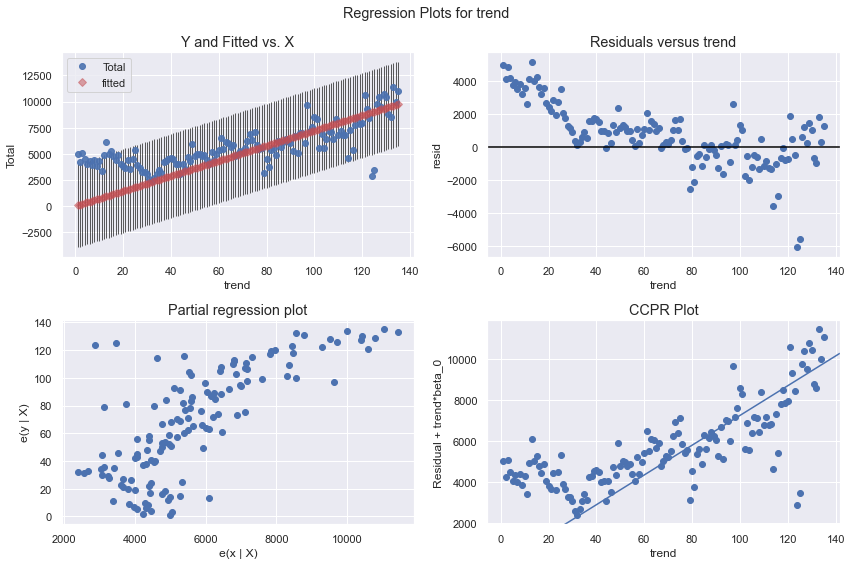

In [272]:
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'trend', fig=fig)

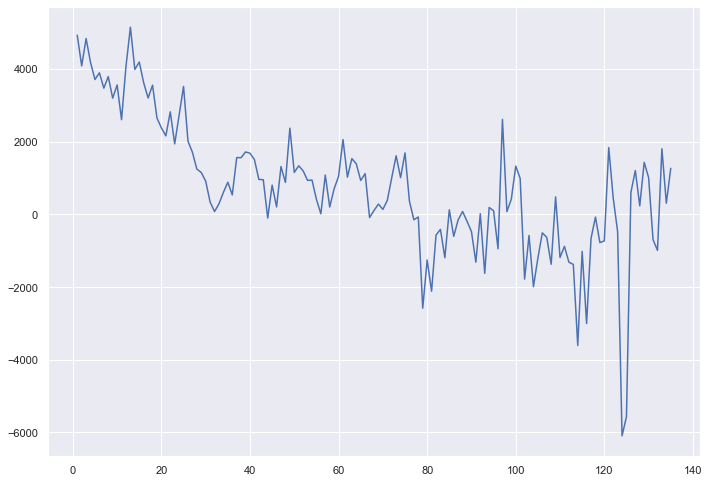

In [273]:
plt.plot( firms.trend, model.resid);

In [274]:
from statsmodels.graphics.tsaplots import plot_acf

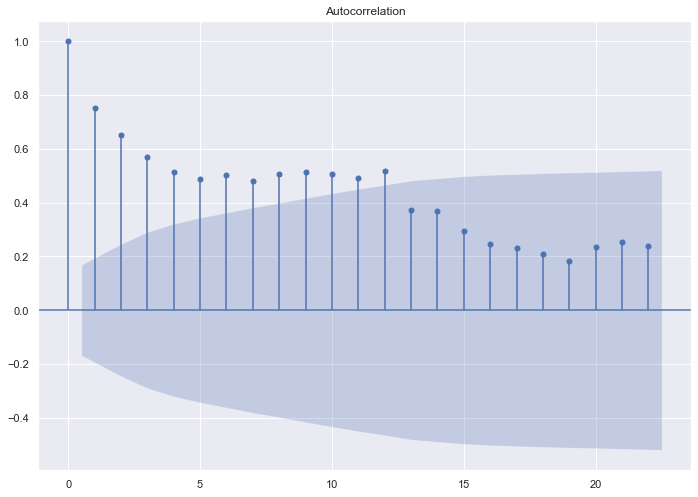

In [275]:
plot_acf(model.resid)
plt.show();

- From the residual analysis, it can be seen that the normality assumptions are failed because the variance between the zero mean is high and also residuals seem to have a autocorrelation in itself. We can add a seasonality variable, month information, to see whether the model is better or not. 

In [276]:
df.drop(df.tail(10).index,
        inplace = True)
df

,Date,TP AC2 TOP A,Unnamed: 2
0,2010-01,5000,NaN
1,2010-02,4230,NaN
2,2010-03,5055,NaN
3,2010-04,4466,NaN
4,2010-05,4072,NaN
...,...,...,...
130,2020-11,8782,NaN
131,2020-12,8560,NaN
132,2021-01,11428,NaN
133,2021-02,10001,NaN


In [277]:
firms['month'] = pd.DatetimeIndex(df['Date']).month
firms

,Total,trend,month
Date,,,
2010-01,5000,1,1
2010-02,4230,2,2
2010-03,5055,3,3
2010-04,4466,4,4
2010-05,4072,5,5
...,...,...,...
2020-11,8782,131,11
2020-12,8560,132,12
2021-01,11428,133,1


In [278]:
X = firms.drop("Total", axis = 1)
X

,trend,month
Date,,
2010-01,1,1
2010-02,2,2
2010-03,3,3
2010-04,4,4
2010-05,5,5
...,...,...
2020-11,131,11
2020-12,132,12
2021-01,133,1


In [279]:
y = firms["Total"]
y

Date
2010-01     5000
2010-02     4230
2010-03     5055
2010-04     4466
2010-05     4072
           ...  
2020-11     8782
2020-12     8560
2021-01    11428
2021-02    10001
2021-03    11034
Name: Total, Length: 135, dtype: object

In [280]:
lm = sm.OLS(y.astype(float),X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              614.5
Date:                Thu, 06 May 2021   Prob (F-statistic):                    6.53e-68
Time:                        21:26:41   Log-Likelihood:                         -1209.4
No. Observations:                 135   AIC:                                      2423.
Df Residuals:                     133   BIC:                                      2429.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         61.1132      3.268     18.701      0.000      54.649      67.577
month        156.7471     35.160      4.458      0.000      87.202     226.292
==============================================================================
Omnibus:                        2.343   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                2.001
Skew:                          -0.126   Prob(JB):                        0.368
Kurtosis:                       3.540   Cond. No.                         17.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

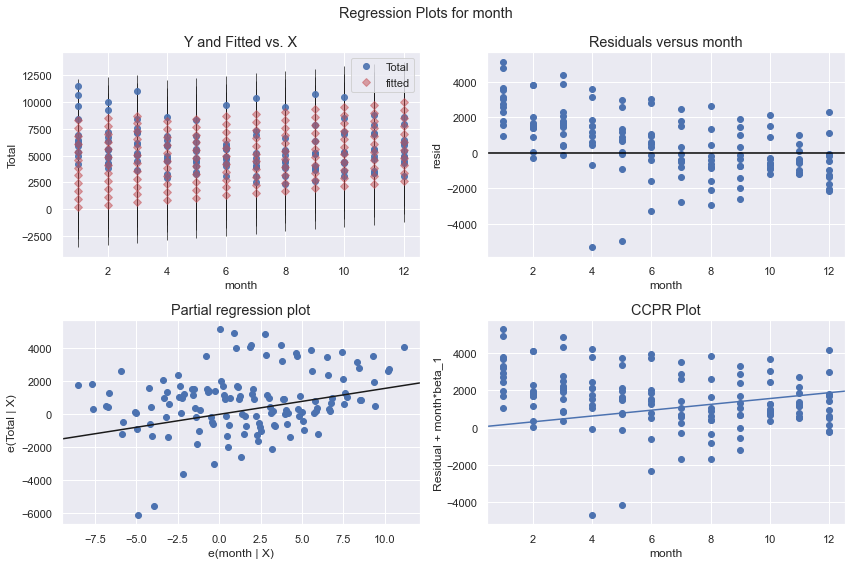

In [281]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'month', fig=fig)

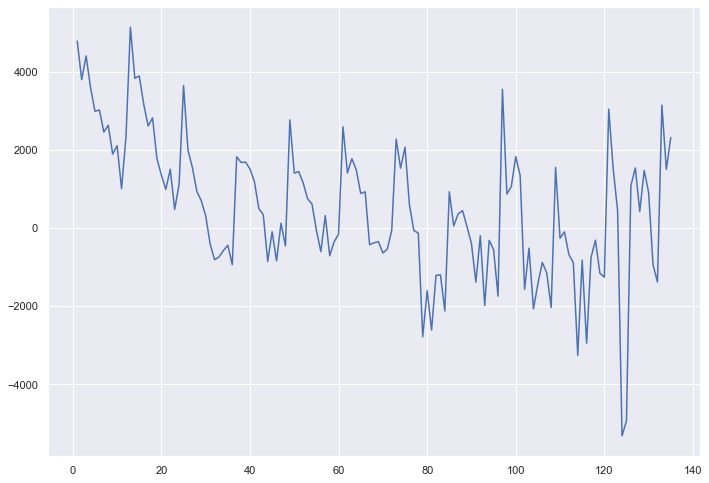

In [282]:
plt.plot(firms.trend, model.resid);

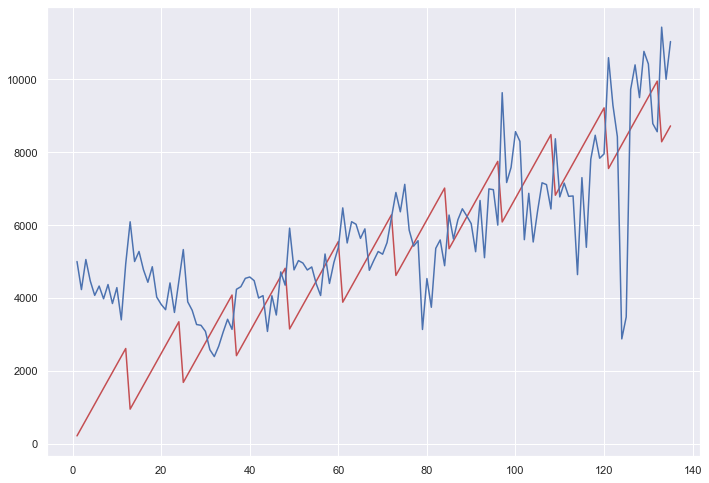

In [283]:
new_df = pd.DataFrame(model.fittedvalues,  index = model.fittedvalues.index)
new_df.columns = ["Fitted"]
new_df["Real"] = firms["Total"]
plt.plot(firms.trend,new_df.Fitted, c = "r")
plt.plot(firms.trend,new_df.Real, c = "b")
plt.show()

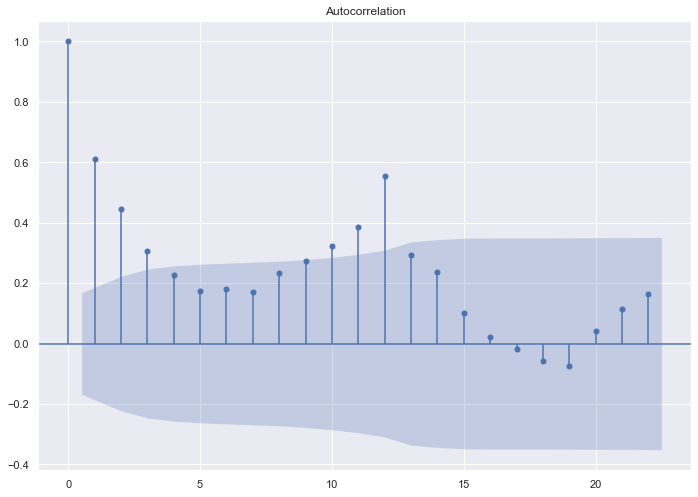

In [284]:
plot_acf(model.resid)
plt.show();

- In the second attempt, residuals seem to behave more like normal distribution but the errors are stil high and the ACF seems to fail since the lag 1 has a  high autocorrelation. Thus, I decided to use the lag as regressor in the model. 

In [285]:
lag = firms["Total"].shift(-1)
firms["lag"] = lag
firms.drop(firms.tail(1).index, inplace = True)

In [286]:
X = firms.drop("Total", axis = 1)
X

,trend,month,lag
Date,,,
2010-01,1,1,4230
2010-02,2,2,5055
2010-03,3,3,4466
2010-04,4,4,4072
2010-05,5,5,4327
...,...,...,...
2020-10,130,10,8782
2020-11,131,11,8560
2020-12,132,12,11428


In [287]:
y = firms["Total"]
y

Date
2010-01     5000
2010-02     4230
2010-03     5055
2010-04     4466
2010-05     4072
           ...  
2020-10    10419
2020-11     8782
2020-12     8560
2021-01    11428
2021-02    10001
Name: Total, Length: 134, dtype: object

In [288]:
lm = sm.OLS(y.astype(float),X.astype(float))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1027.
Date:                Thu, 06 May 2021   Prob (F-statistic):                    8.67e-91
Time:                        21:26:43   Log-Likelihood:                         -1140.7
No. Observations:                 134   AIC:                                      2287.
Df Residuals:                     131   BIC:                                      2296.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         12.7579      4.084      3.124      0.002       4.678      20.838
month        -29.8508     26.770     -1.115      0.267     -82.808      23.106
lag            0.8429      0.062     13.674      0.000       0.721       0.965
==============================================================================
Omnibus:                       47.462   Durbin-Watson:                   2.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.004
Skew:                          -1.110   Prob(JB):                     3.43e-52
Kurtosis:                       9.125   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- It is necessary to note that now the prdictor month became insignificant after we added the lag as regressor but the overall model score has increased. 

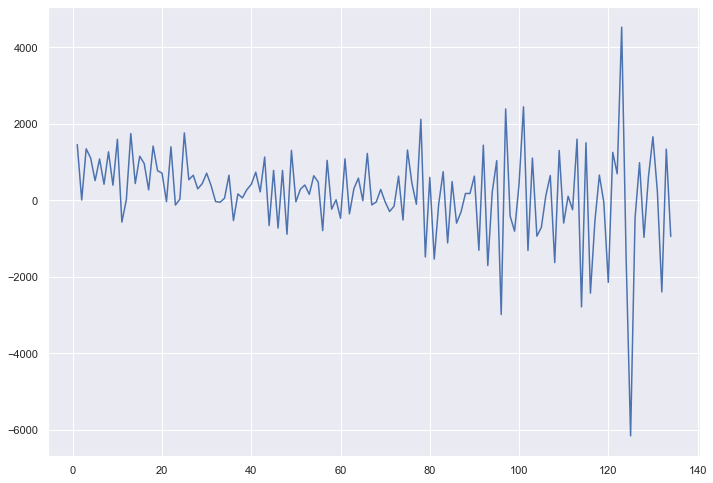

In [289]:
plt.plot(firms.trend, model.resid);

- Residuals got closer to the zero mean and no signs of autocorrelation. 

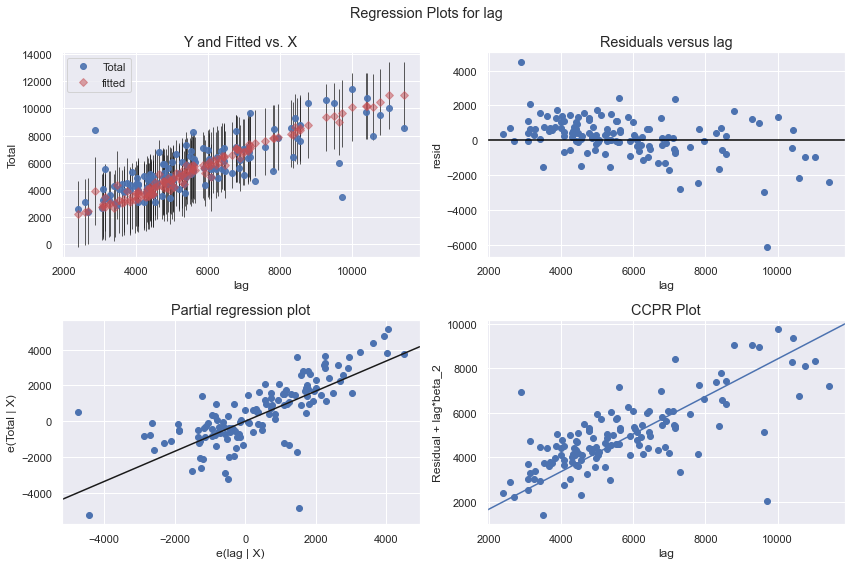

In [290]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'lag', fig=fig)

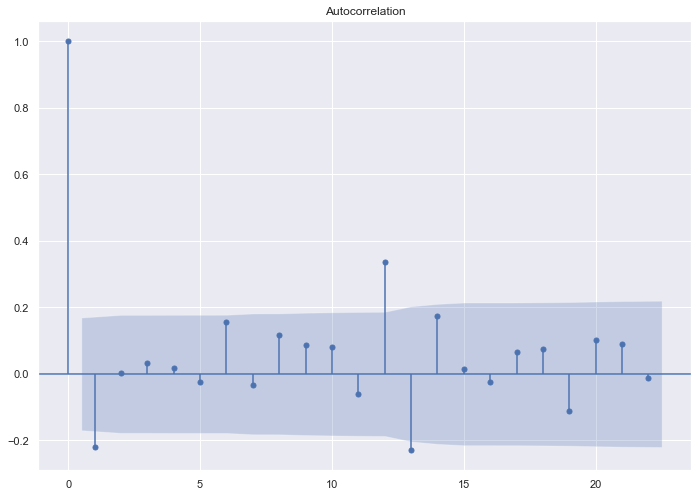

In [291]:
plot_acf(model.resid)
plt.show();

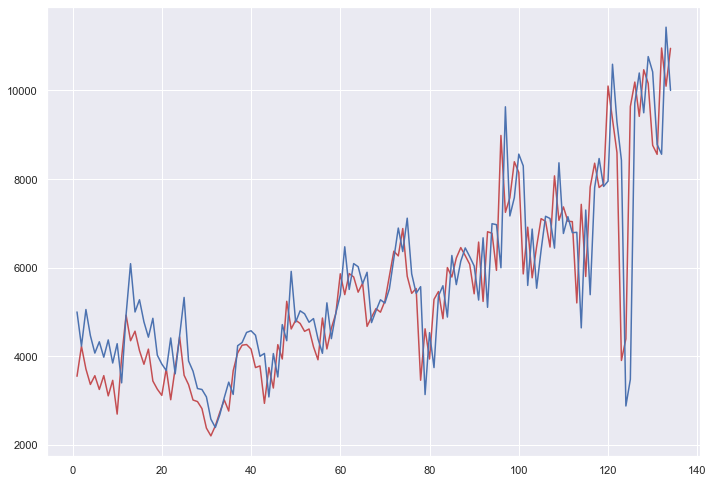

In [292]:
new_df = pd.DataFrame(model.fittedvalues,  index = model.fittedvalues.index)
new_df.columns = ["Fitted"]
new_df["Real"] = firms["Total"]
plt.plot(firms.trend,new_df.Fitted, c = "r")
plt.plot(firms.trend,new_df.Real, c = "b")
plt.show()

- Now our errors got smaller and we have a better model to predict but since the month variable seemed unsignificant, I want to model it without month predictor. 

In [293]:
X = firms.drop( "Total", axis = 1)
X = X.drop("month", axis = 1)

X


,trend,lag
Date,,
2010-01,1,4230
2010-02,2,5055
2010-03,3,4466
2010-04,4,4072
2010-05,5,4327
...,...,...
2020-10,130,8782
2020-11,131,8560
2020-12,132,11428


In [294]:
y = firms["Total"]
y

Date
2010-01     5000
2010-02     4230
2010-03     5055
2010-04     4466
2010-05     4072
           ...  
2020-10    10419
2020-11     8782
2020-12     8560
2021-01    11428
2021-02    10001
Name: Total, Length: 134, dtype: object

In [295]:
lm = sm.OLS(y.astype(float),X.astype(float))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1537.
Date:                Thu, 06 May 2021   Prob (F-statistic):                    3.63e-92
Time:                        21:26:44   Log-Likelihood:                         -1141.3
No. Observations:                 134   AIC:                                      2287.
Df Residuals:                     132   BIC:                                      2292.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         13.2198      4.067      3.250      0.001       5.175      21.265
lag            0.8068      0.053     15.363      0.000       0.703       0.911
==============================================================================
Omnibus:                       41.753   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.203
Skew:                          -0.993   Prob(JB):                     1.65e-40
Kurtosis:                       8.373   Cond. No.                         233.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

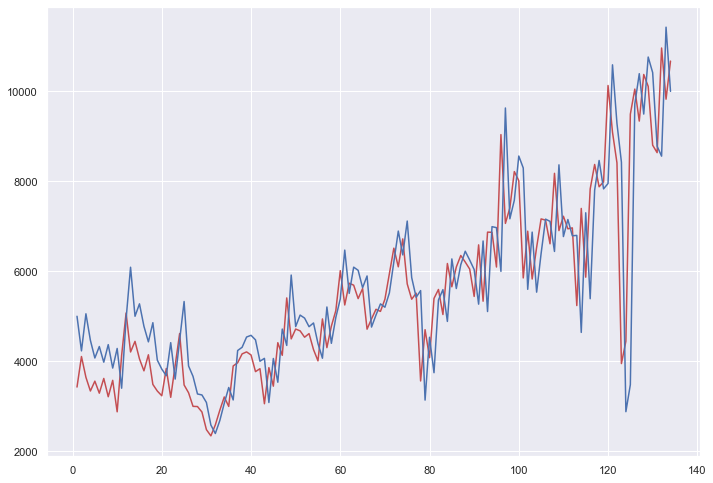

In [296]:
new_df = pd.DataFrame(model.fittedvalues,  index =X.index )
new_df.columns = ["Fitted"]
new_df["Real"] = firms["Total"]
plt.plot(firms.trend,new_df.Fitted, c = "r")
plt.plot(firms.trend,new_df.Real, c = "b")
plt.show()

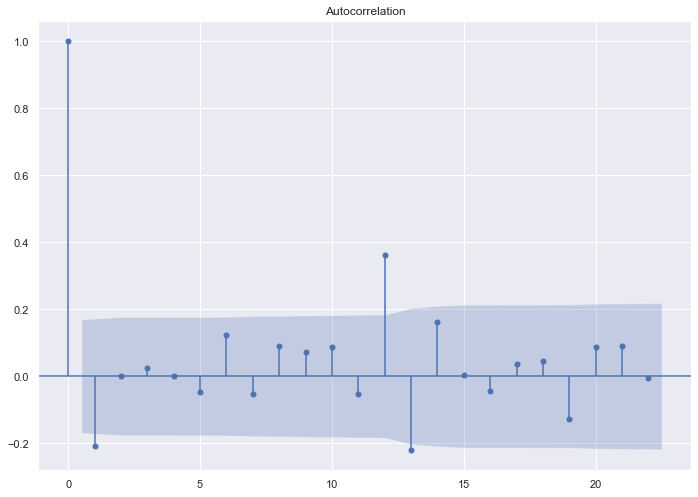

In [297]:
plot_acf(model.resid)
plt.show();

- After taking the the predictor monnth, our model results have not  been changed so we did see that it is not significant. Looking the final form of the model, we have a relatively good R-squared values, normality assumptions seem fine, residuals are not correlated and autocorrelation supports that. Thus, we can use our model to predict the date "2021-04"

In [298]:
model.params

trend    13.219805
lag       0.806784
dtype: float64

In [299]:
trend = 13.219805
lag = 0.806784
new_trend = 136
new_lag = 11034

In [300]:
prediction = trend * new_trend + lag*new_lag
prediction

10699.948136

- Prediction for the month "2021-04"

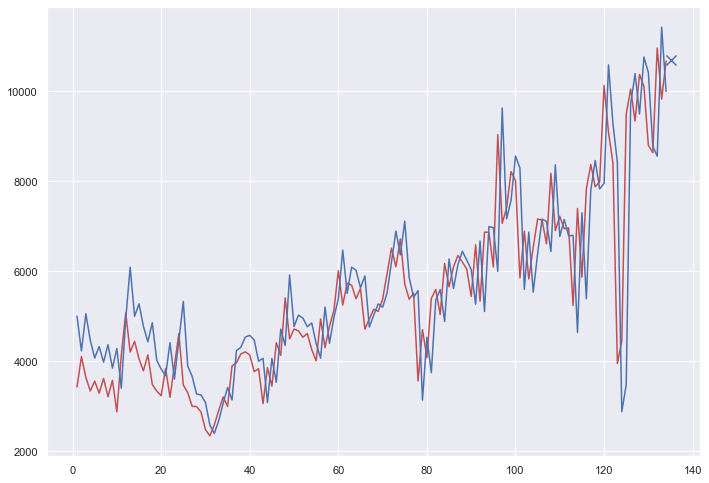

In [301]:
new_df = pd.DataFrame(model.fittedvalues,  index =X.index )
new_df.columns = ["Fitted"]
new_df["Real"] = firms["Total"]
plt.plot(firms.trend,new_df.Fitted, c = "r")
plt.plot(firms.trend,new_df.Real, c = "b")
plt.scatter(x = 135,y =  prediction, s = 100., marker = "x")
plt.show()

# Conclusion 
- To sum up, in this homework, I managed to fit a model that explaining the time series data "Newly Established Total Firms". I could not find an external predictor that is correlated with my data instead I used trend component and the lag one period before as regressors but the results seem logical. Lastly, I predicted the value of the date "2021-04" and showed as a tick in the last plot. 